In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [65]:
path = os.getcwd()
os.listdir(path)

['.ipynb_checkpoints', 'data', 'main.ipynb', 'Описание.txt']

In [74]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files from all folders and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("csv"):
            data_path = f"{current_path}\{file}"
            temp_df = pd.read_csv(data_path)

            path_split_for_parse = current_path.split("\\")
            
            temp_df["name"] = path_split_for_parse[-1]
            temp_df["date"] = path_split_for_parse[-2]

            df = pd.concat((df, temp_df), axis=0)
        

In [75]:
# Bringing 'df' back to normal

df.date = pd.to_datetime(df.date)
df.reset_index(drop=True, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)

df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [76]:
# Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

customers_by_quantity = df.groupby("name", as_index=False). \
                    agg({"quantity": "sum"}). \
                    sort_values("quantity", ascending=False)

quantity_most_customers = customers_by_quantity.quantity.max()
most_customers = customers_by_quantity.query("quantity == @quantity_most_customers"). \
                                        name. \
                                        to_list()
most_customers

['Alexey_Smirnov', 'Petr_Smirnov']

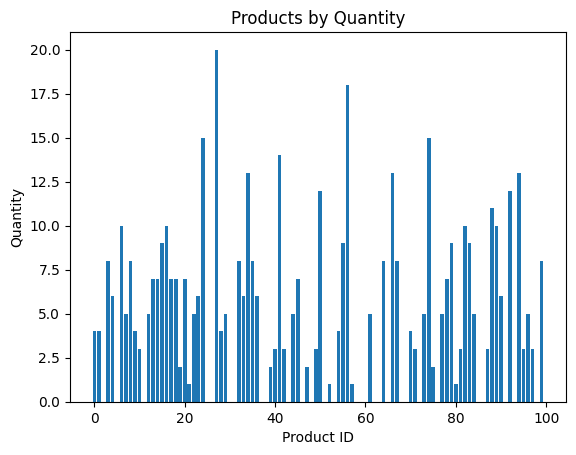

In [77]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
# Сколько было продано единиц товара с product_id==56?

products_by_quantity = df.groupby("product_id", as_index=False). \
                    agg({"quantity": "sum"}). \
                    sort_values("quantity", ascending=False)

# Построение bar plot
plt.bar(products_by_quantity["product_id"], products_by_quantity["quantity"])

# Настройка осей и заголовка графика
plt.xlabel("Product ID")
plt.ylabel("Quantity")
plt.title("Products by Quantity")

# Отображение графика
plt.show()

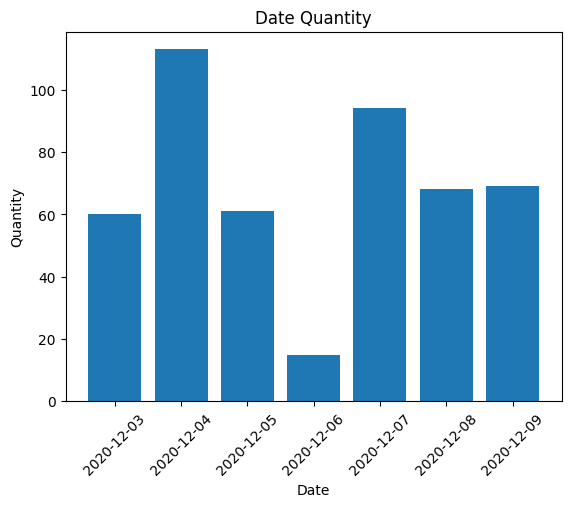

In [78]:
# Визуализируйте продажи по дням.

date_quantity = df.groupby("date", as_index=False). \
                    agg({"quantity": "sum"}). \
                    sort_values("quantity", ascending=False)

# Построение bar plot
plt.bar(date_quantity["date"], date_quantity["quantity"])

plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Date Quantity")

plt.xticks(rotation=45)

plt.show()

In [88]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

quantity_more_one_purchase = df.groupby(["name", "product_id"], as_index=False). \
    agg({"quantity" : "sum"}). \
    query("quantity > 1")

quantity_users_more_one_purchase = len(quantity_more_one_purchase.name.unique())
quantity_users_more_one_purchase

21